<h2> Project 1: Word Cloud</h2>

In [2]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud#create dataframe from csv
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]
print(df.shape)

spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)


To begin, you will first work through processing the data. Start by loading in the training data and test data. Keep each in their own dataframe/list (i.e., a dataframe/list for all training observations and a separate one for all test observations). How many training and test observations do you have?<br><br>

<li>Create a vector of training labels. What does the distribution of labels look like for the training set and the test set? Comment on what you see.  <br><br>
<li>Convert the training data to lowercase. Remove punctuation from the training data. Also remove stop words from the training data using the NLTK package’s English stop word list. In addition to NLTK’s stop words, are there words specific to this dataset that may be worthwhile to treat as stop words? What are these words and why would you exclude them? Remove these additional stop words from the training data as well. (Note: You can also remove this secondary set of stop words after tokenizing. However, keep in mind that this may cause feature alignment issues with your test dataset when you tokenize it.)<br><br>
<li>Stem/lemmatize your training data using a stemmer/lemmatizer of your choosingLinks to an external site..  Show a before and after using a few observations and comment on what you see.<br><br>
<li>Tokenize your training data using unigrams (hint: see sklearn’s CountVectorizer). If you set upper and lower limits on word frequency, what are they? How many unique tokens are in your vocabulary?<br><br>
<li>Process the test data in a manner identical to the training data. Note that you will need to have the same dimensions for your training and test data. One way in which this can be done is using sklearn’s CountVectorizer to fit on the training data and transform the test data. Show that the number of features for your training and test data are identical.

In [7]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
        
df.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


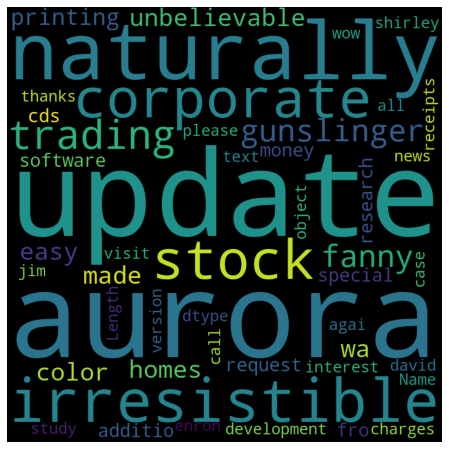

In [19]:
df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

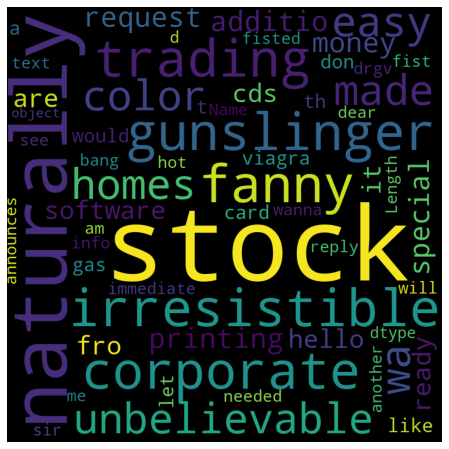

In [20]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

#instantiate the class
cv = CountVectorizer()

# tokenize and build vocab
cv.fit(text)

# summarize
print(cv.vocabulary_)

# encode document
vector = cv.transform(text)

# summarize encoded vector
print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
text_vec = CountVectorizer().fit_transform(df['text'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45
                                                    , random_state = 42, shuffle = True)

from sklearn import ensemble 
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #controls rate at which additional decision trees influes overall prediction
    max_depth = 6, 
#     min_samples_split = 21,
#     min_samples_leaf = 19, 
    #max_features = 0.9,
    #loss = 'huber'
)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1926
           1       0.98      0.89      0.93       637

    accuracy                           0.97      2563
   macro avg       0.97      0.94      0.96      2563
weighted avg       0.97      0.97      0.97      2563



In [23]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00       731

    accuracy                           1.00      3132
   macro avg       1.00      1.00      1.00      3132
weighted avg       1.00      1.00      1.00      3132

Confusion Matrix: 
 [[2401    0]
 [   0  731]]

Accuracy:  1.0


In [24]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1926
           1       0.98      0.89      0.93       637

    accuracy                           0.97      2563
   macro avg       0.97      0.94      0.96      2563
weighted avg       0.97      0.97      0.97      2563

Confusion Matrix: 
 [[1917    9]
 [  70  567]]

Accuracy:  0.9691767460007803


In [27]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,text,spam,tb_Pol,tb_Subj
0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581


<h3>Assignment Questions:</h3>
This project was a wordcloud task that aimed to look at most frequent words used. We run through preprocessing, exploratory data analysis, processing through built-in NLP models and then assessed accuracy of outputs.
<b>Inputs: One to two sentences:</b><br>
For this wordcloud NLP task, we input a csv file of emails which is essentially raw strings of text. The code preprocesses the text strings to create vectorized words from the raw text strings. 


<b>Outputs: One to two sentences:</b><br>
The outputs for this task were wordclouds or vizualizations of text data frequencies. Words that appeared more frequently within the raw text file (emails) will appear largers in the cloud. The aim of this visualization is to identify key words.
   
   
<b>Probable Architecture: One of these:</b><br>
The architecture would be visual representation of word frequency which indicates the importance or prevelance of a word. In the context of the above, this would be feed forward as their is no repeate processing other than counts.